In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import math
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder


# HW

ทำการใช้ kNN algorithm มา predict ข้อมูลใน Apple Quality Dataset ใน column ส่วนข้อมูล Quality (binary classification) แล้วหาผลลัพธ์ ดังนี้
  
1. ให้สร้าง train set และ test set จาก dataset ที่กำหนด โดยให้ test_size=0.3 และ random_state=4
2. ให้หาค่า k ที่ดีที่สุดในช่วง 1 ถึง 30
3. ให้หาค่า accuracy ที่สูงที่สุด ในช่วง k ที่กำหนด

In [2]:
apple = pd.read_csv(r'C:\Users\user\git\Machine-Learning-Lab-KMITL\week_3 homework\apple_quality.csv').dropna()
apple

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [3]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


1. ให้สร้าง train set และ test set จาก dataset ที่กำหนด โดยให้ test_size=0.3 และ random_state=4

In [4]:
X = apple.loc[:, "Size":"Acidity"]
y = apple['Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.3, shuffle=True)

2. ให้หาค่า k ที่ดีที่สุดในช่วง 1 ถึง 30

    ค่า k ที่ดีที่สุดคือ 5 เพราะเมื่อใช้จํานวน Neighbors ด้วยค่านี้จากค่าทั้งหมดในช่วง 1-30 

    ซึ่งพบว่าการทํานายของโมเดลได้ความแม่นยําสูงสุด (accuracy สูงสุด)

In [5]:
nK = 30
mean_acc = list()
for n in range(1, nK+1):
  knn_mul = KNeighborsClassifier(n_neighbors=n)
  knn_mul.fit(X_train, y_train)
  predictions_mul = knn_mul.predict(X_test)
  mean_acc.append(accuracy_score(y_test, predictions_mul))

optimal_k = np.argmax(mean_acc)
print(f"ค่า k ที่ดีที่สุดคือ {optimal_k + 1} มีค่า accuracy เป็น {mean_acc[optimal_k]}")

ค่า k ที่ดีที่สุดคือ 5 มีค่า accuracy เป็น 0.8883333333333333


3. ให้หาค่า accuracy ที่สูงที่สุด ในช่วง k ที่กำหนด

    จากการ plot กราฟความสัมพันธ์ระหว่างจํานวน Neighbors(ค่า k) และ accuracy (ที่ได้จากการทํานายด้วยโมเดล K-Nearest Neighbors)

    พบว่าที่เมื่อ k=5 จะมีค่า accuracy สูงสุดอยู่ที่ 0.8883

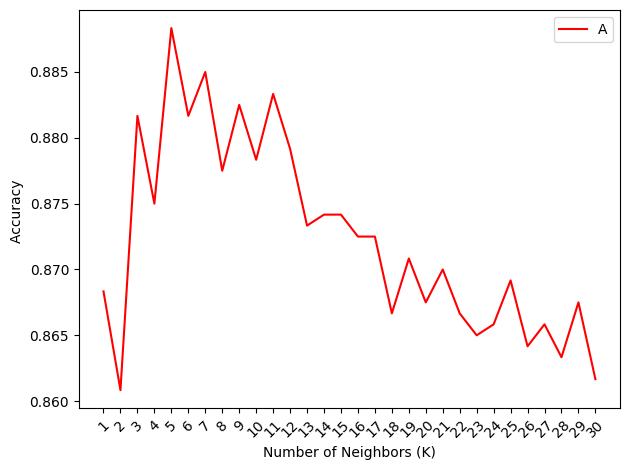

In [6]:
plt.plot(range(1, nK+1), mean_acc, 'r')
plt.xticks(range(1, nK+1), fontsize=10, rotation=45)
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()